In [3]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit
import os

In [4]:
def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, 7):
        ctr = params[0]+i*params[1]
        wid = np.sqrt(params[2]**2+i*(params[3]**2))
        amp = params[4+i]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
    return y

In [5]:
file_list=[]
for x in os.listdir():
    if x.endswith(".dat"):
        print(x)
        file_list.append(x)

channel_11.dat


number of waveforms:  5000
channel_11.dat


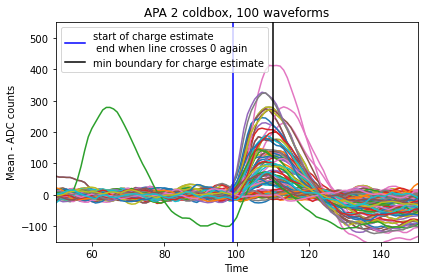

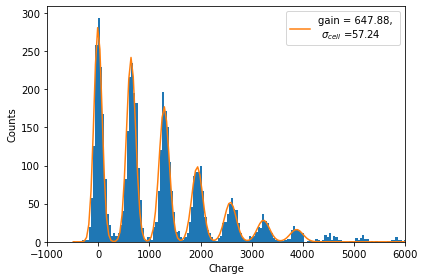

Mean_0:  -8.174016225319829 gain:  647.8799272415496
Width_0:  113.46742025506485 sigma_cell:  57.244840880058256
Amplitude:  [281.6308509  241.76725245 177.13826323  98.55485583  51.94731552
  28.27815631  16.11420552]


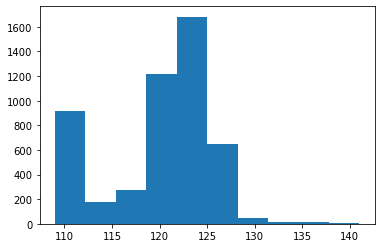

In [6]:
for files in file_list:
    plt.clf()
    count=0
    wf=[]
    list_wf=[]
    f= open(files,"r")
    for x in f:
        #one waveform is 512 datapoints
        if count<512:
            count = count +1
            wf.append(int(x.strip()))
        if count==512:
            count=0
            mean_wf = np.mean(wf)
            list_wf.append([mean_wf - wf[i] for i in range(len(wf))])
            wf=[]
    print("number of waveforms: ",len(list_wf))
    print(files)
    #plt.xlim(95,200)
    #plt.yticks(list_wf[0][::100])
    
    #charge estimate
    t1=0
    list_t1=[]
    noise_count=0
    list_charge=[]
    for i in range(len(list_wf)):
        #check after moving some distance from 99
        for j in range(110,150):
            if list_wf[i][j]<0:
                t1=j-1
                break
        list_t1.append(t1)
        charge = np.sum(list_wf[i][99:t1])
        list_charge.append(charge)
        
    #plot waveforms
    for i in range(100):
        plt.plot([i for i in range(512)],[list_wf[i][j] for j in range(512)])
    #plt.hist(list_wf[i],bins=512)
    plt.xlabel("Time")
    plt.axvline(x = 99, color = 'b', label = 'start of charge estimate \n end when line crosses 0 again')
    plt.axvline(x = 110, color = 'k', label = 'min boundary for charge estimate')
    plt.title("APA 2 coldbox, 100 waveforms")
    plt.xlim(50,150)
    plt.ylim(-150,550)
    plt.ylabel("Mean - ADC counts")
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.savefig("waveform_noise.png",dpi=200)
    
    #charge histogram and gaussian fit
    guess = [0, 600, 80, 80, 200, 200, 200, 100, 100,100,100]
    n, bins, patches = plt.hist(list_charge, bins=200)
    popt, pcov = curve_fit(func, bins[:110],n[:110] ,p0=guess)
    fit = func(bins, *popt)
    plt.xlabel("Charge")
    plt.ylabel("Counts")
    plt.xlim(-1000,6000)
    plt.plot(bins,fit, label=("gain = %.2f, \n $\sigma_{cell}$ =%.2f "%(popt[1],popt[3])))
    plt.legend()
    plt.tight_layout()
    plt.savefig(files+".png",dpi=200)
    plt.show()
    print("Mean_0: ", popt[0], "gain: ",popt[1])
    print("Width_0: ", popt[2], "sigma_cell: ",popt[3])
    print("Amplitude: ",popt[4:])
    
    plt.hist(list_t1)

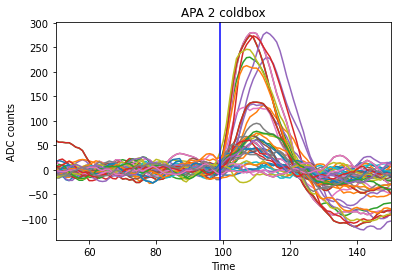

In [7]:
#for i in range(len(list_wf)):
for i in range(2,50):
    plt.plot([i for i in range(512)],[list_wf[i][j] for j in range(512)])
    #plt.hist(list_wf[i],bins=512)
plt.xlabel("Time")
plt.title("APA 2 coldbox")
plt.ylabel("ADC counts")
plt.axvline(x = 99, color = 'b', label = 'start of charge estimate')
plt.xlim(50,150)
plt.savefig("waveform_noise.png",dpi=200)
#plt.xlim(95,200)
#plt.yticks(list_wf[0][::100])
plt.show()
#99 is t0